# Project: Expert System for Analyzing Player Statistics in La Liga: A Data-driven Approach. - [we use data downloaded from FBref on players in La Liga.]

## Table of Contents
<ul>
    <li>
        <a href="#intro">
            Introduction
        </a>
    </li>
    <li>
        <a href="#wrangling">
            Data Wrangling
            <ol>
            <li>
                <a href="#Gathering">Gathering Data</a>
            </li>
            <li>
                <a href="#Assessing">Assessing Data</a>
            </li>
            <li>
                <a href="#Cleaning">Cleaning Data</a>
            </li>
            </ol>
        </a>
    </li>
    <li>
        <a href="#eda">
            Exploratory Data Analysis
        </a>
    </li>
    <li>
        <a href="#ES">
            Expert System
        </a>
    </li>
    <li>
        <a href="#mlm">
            Machine Learning Model
        </a>
    </li>
    <li>
        <a href="#conclusions">
            Conclusions
        </a>
    </li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://fbref.com/en/comps/8/passing/Champions-League-Stats). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


In [1]:
#ipython kernel install --user --name=venv
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**

Data Wrangling which include :

    1.Gathering Data
    2.Assessing Data
    3.cleaning Data

<a id='Gathering'></a>
## Gathering Data
In this example we use data downloaded from [FBref](https://fbref.com/en/comps/12/2021-2022/stats/2021-2022-La-Liga-Stats) on players in La Liga.
We just use the age and minutes played columns.
And we only take the first 15 observations, to help visualise the process.
Download [playerstats.csv](https://github.com/soccermatics/Soccermatics/blob/main/course/lessons/lesson2/playerstats.csv)
your working directory.

In [2]:
laliga_df=pd.read_csv("playerstats.csv",delimiter=',')

In [3]:
laliga_df.head()

,id,name,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,Gls,Ast,CrdY,CrdR
0,1,Luis Abram,pe PER,DF,Granada,25.0,1996.0,8,6,560,6.2,0,0,2,0
1,2,Marcos Acuña,ar ARG,DF,Sevilla,29.0,1991.0,31,26,2260,25.1,1,3,10,0
2,3,Martin Agirregabiria,es ESP,DF,Alavés,25.0,1996.0,24,17,1616,18.0,0,1,4,0
3,4,Julen Agirrezabala,es ESP,GK,Athletic Club,20.0,2000.0,4,4,360,4.0,0,0,0,0
4,5,Sergio Agüero,ar ARG,FW,Barcelona,33.0,1988.0,4,2,151,1.7,1,0,0,0


#### Data Dictionary

01 - id     : player id.

02 - name   : player name.

03 - Nation : player nationality.

04 - pos    : the player position.

05 - Squad  : the club where player play in.

06 - Age    : How old is the player.
   
07 - Born   : the year Where player born in.

08 - MP     : the number of matches that player play

09 - Starts : the number of matches that player start playing in it.

10 - Min    : the number of matches that player play in all matches

11 - 90s    : the number of matches that player play if he play from the beginning of the match to the end

12 - Gls    : the number of goals that player acheives in all matches

13 - Ast    : the number of goals that player acheives in all matches

14 - CrdY   : the number of yellow cards that player took in all matches

15 - CrdR   : the number of red cards that player took in all matches

<a id='Assessing'></a>
## Assessing Data 
We assessing our data using some function like : shape , ndim , dtypes , size  , info() , nunique() , isnull()

In [4]:
# return number of columns and number of row
laliga_df.shape

(617, 15)

In [5]:
#return number of dimensions of data
laliga_df.ndim

2

In [6]:
#return types of each column
laliga_df.dtypes

id          int64
name       object
Nation     object
Pos        object
Squad      object
Age       float64
Born      float64
MP          int64
Starts      int64
Min         int64
90s       float64
Gls         int64
Ast         int64
CrdY        int64
CrdR        int64
dtype: object

In [7]:
#return number of unique value
laliga_df.nunique()

id        617
name      603
Nation     64
Pos        11
Squad      20
Age        25
Born       24
MP         38
Starts     39
Min       516
90s       270
Gls        19
Ast        13
CrdY       15
CrdR        3
dtype: int64

In [8]:
# return which value is nul or not for each columns in DataSet 
laliga_df.isnull().any()

id        False
name      False
Nation     True
Pos       False
Squad     False
Age        True
Born       True
MP        False
Starts    False
Min       False
90s       False
Gls       False
Ast       False
CrdY      False
CrdR      False
dtype: bool

In [9]:
#return number of columns has a null value
laliga_df.isnull().any().sum()

3

In [10]:
#return number of columns has a null value
laliga_df.isnull().sum()

id        0
name      0
Nation    1
Pos       0
Squad     0
Age       1
Born      1
MP        0
Starts    0
Min       0
90s       0
Gls       0
Ast       0
CrdY      0
CrdR      0
dtype: int64

In [11]:
laliga_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      617 non-null    int64  
 1   name    617 non-null    object 
 2   Nation  616 non-null    object 
 3   Pos     617 non-null    object 
 4   Squad   617 non-null    object 
 5   Age     616 non-null    float64
 6   Born    616 non-null    float64
 7   MP      617 non-null    int64  
 8   Starts  617 non-null    int64  
 9   Min     617 non-null    int64  
 10  90s     617 non-null    float64
 11  Gls     617 non-null    int64  
 12  Ast     617 non-null    int64  
 13  CrdY    617 non-null    int64  
 14  CrdR    617 non-null    int64  
dtypes: float64(3), int64(8), object(4)
memory usage: 72.4+ KB


<a id='Cleaning'></a>
## Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

    1.duplicated data
    
    2.missing value
    
    3.incorrect datatype

### duplicicated data

In [12]:
#check for duplicated data
sum(laliga_df.duplicated())

0

### missing value

In [13]:
laliga_df.dropna(inplace = True)

### incorrect datatype

In [14]:
laliga_df[['Age','Born']] = laliga_df[['Age','Born']].astype('Int64')

In [15]:
laliga_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 616 entries, 0 to 616
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      616 non-null    int64  
 1   name    616 non-null    object 
 2   Nation  616 non-null    object 
 3   Pos     616 non-null    object 
 4   Squad   616 non-null    object 
 5   Age     616 non-null    Int64  
 6   Born    616 non-null    Int64  
 7   MP      616 non-null    int64  
 8   Starts  616 non-null    int64  
 9   Min     616 non-null    int64  
 10  90s     616 non-null    float64
 11  Gls     616 non-null    int64  
 12  Ast     616 non-null    int64  
 13  CrdY    616 non-null    int64  
 14  CrdR    616 non-null    int64  
dtypes: Int64(2), float64(1), int64(8), object(4)
memory usage: 78.2+ KB


In [16]:
laliga_df.to_csv("playerstatsProcessed.csv", encoding='utf-8',index=False)

In [17]:
laliga_df_processed = pd.read_csv("playerstatsProcessed.csv",delimiter=',')

In [18]:
laliga_df_processed.head()

,id,name,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,Gls,Ast,CrdY,CrdR
0,1,Luis Abram,pe PER,DF,Granada,25,1996,8,6,560,6.2,0,0,2,0
1,2,Marcos Acuña,ar ARG,DF,Sevilla,29,1991,31,26,2260,25.1,1,3,10,0
2,3,Martin Agirregabiria,es ESP,DF,Alavés,25,1996,24,17,1616,18.0,0,1,4,0
3,4,Julen Agirrezabala,es ESP,GK,Athletic Club,20,2000,4,4,360,4.0,0,0,0,0
4,5,Sergio Agüero,ar ARG,FW,Barcelona,33,1988,4,2,151,1.7,1,0,0,0


In [19]:
laliga_df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      616 non-null    int64  
 1   name    616 non-null    object 
 2   Nation  616 non-null    object 
 3   Pos     616 non-null    object 
 4   Squad   616 non-null    object 
 5   Age     616 non-null    int64  
 6   Born    616 non-null    int64  
 7   MP      616 non-null    int64  
 8   Starts  616 non-null    int64  
 9   Min     616 non-null    int64  
 10  90s     616 non-null    float64
 11  Gls     616 non-null    int64  
 12  Ast     616 non-null    int64  
 13  CrdY    616 non-null    int64  
 14  CrdR    616 non-null    int64  
dtypes: float64(1), int64(10), object(4)
memory usage: 72.3+ KB


<a id='eda'></a>
## Exploratory Data Analysis

In [20]:
#return statistical descriptive of dataset for each column
laliga_df_processed[['Age', 'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'CrdY', 'CrdR']].describe()

,Age,MP,Starts,Min,90s,Gls,Ast,CrdY,CrdR
count,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000
mean,25.935065,19.157468,13.569805,1218.832792,13.542370,1.508117,1.077922,3.199675,0.149351
std,4.661101,11.714054,11.229389,962.335501,10.691594,2.890399,1.832081,3.055700,0.403762
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,8.000000,3.000000,297.250000,3.300000,0.000000,0.000000,1.000000,0.000000
50%,26.000000,20.000000,12.000000,1109.500000,12.350000,0.000000,0.000000,2.000000,0.000000
75%,29.000000,30.000000,22.000000,1892.750000,21.025000,2.000000,1.250000,5.000000,0.000000
max,40.000000,38.000000,38.000000,3420.000000,38.000000,27.000000,13.000000,15.000000,2.000000


In [21]:
from statmeasures import statisticsMeasures

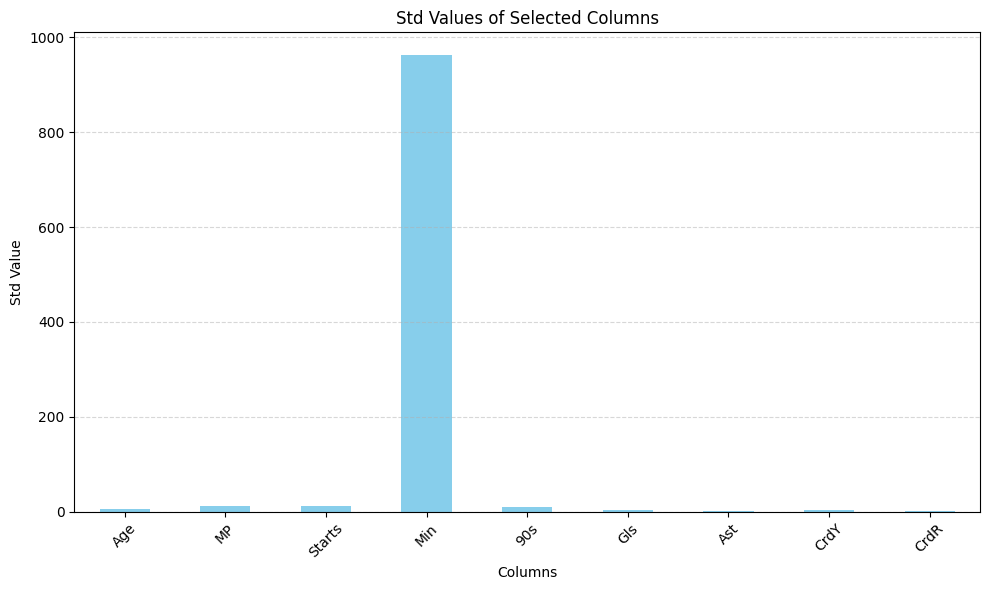

In [22]:
statisticsMeasures('std')

<a id='ES'></a>
## Expert System

Sure, let's start by defining the knowledge base, facts, rules, and the inference engine for an expert system using the data downloaded from FBref on players in La Liga. We'll focus on using the age and minutes played columns from the playerstatsProcessed.csv file

Here's an outline of how we can structure these components:

1. Knowledge Base:
   
    1. Read the data from the playerstats.csv file.
    2. Extract the age and minutes played columns for the first 15 observations. 

2. Facts:

   1. Define facts based on the extracted data.

3. Rules:
    
    1. Define rules based on the relationships between age and minutes played.

4. Inference Engine:

    1. Apply rules to facts to derive conclusions.

In this implementation:

1. We read the data from the playerstats.csv file and extract the age and minutes played columns for the first 15 observations.

2. We define a simple rule stating that if a player's age is less than 25 and they have played more than 1000 minutes, they are considered a key player.

3. The inference engine applies this rule to the facts derived from the knowledge base and generates conclusions.

In [23]:
import expertsys
from expertsys import *
file_path = "playerstatsProcessed.csv"
data = read_data(file_path)
conclusions = infer(data)
for conclusion in conclusions:
    print(conclusion)

Julen Agirrezabala is a key player.
Ilias Akhomach is a key player.
Paul Akouokou is a key player.
Tomás Alarcón is a key player.


In [24]:
# Apply the classification function to each row in the knowledge base
data['Classification'] = data.apply(classify_players, axis=1)

# Display the updated knowledge base with classifications
print(data[['name', 'Age', 'Min', 'Classification']])

                    name  Age   Min Classification
0             Luis Abram   25   560   Unclassified
1           Marcos Acuña   29  2260   Unclassified
2   Martin Agirregabiria   25  1616   Unclassified
3     Julen Agirrezabala   20   360      Promising
4          Sergio Agüero   33   151   Unclassified
5         Álvaro Aguirre   21     9   Unclassified
6           Joseph Aidoo   25  2637   Unclassified
7           Carlos Akapo   28  1844   Unclassified
8         Ilias Akhomach   17   124      Promising
9          Paul Akouokou   23   516      Promising
10           David Alaba   29  2642   Unclassified
11         Tomás Alarcón   22  1425      Promising
12            Jordi Alba   32  2644   Unclassified
13           Raúl Albiol   35  2465   Unclassified
14          Paco Alcácer   27   787   Unclassified


<a id='mlm'></a>
## Machine Learning Model

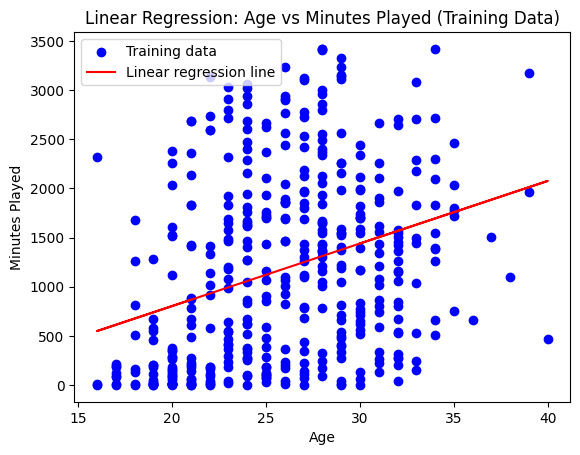

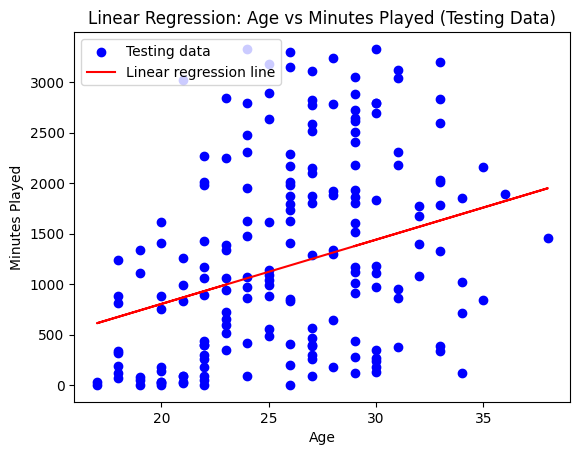

In [25]:
# Splitting the data into features (X) and target variable (y)
X = laliga_df_processed[['Age']]
y = laliga_df_processed['Min']


# Splitting the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Plot the training data and the linear regression line
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, model.predict(X_train), color='red', label='Linear regression line')
plt.xlabel('Age')
plt.ylabel('Minutes Played')
plt.title('Linear Regression: Age vs Minutes Played (Training Data)')
plt.legend()
plt.show()

# Plot the testing data and the linear regression line
plt.scatter(X_test, y_test, color='blue', label='Testing data')
plt.plot(X_test, y_pred, color='red', label='Linear regression line')
plt.xlabel('Age')
plt.ylabel('Minutes Played')
plt.title('Linear Regression: Age vs Minutes Played (Testing Data)')
plt.legend()
plt.show()


### checking fitting for this code
To check the goodness of fit for the linear regression model.
you can use various metrics such as R-squared, mean squared error (MSE), or mean absolute error (MAE). Here's how you can calculate and print these metrics in Python

Training Set Performance:
R-squared: 0.09971693103042589
Mean Squared Error: 816575.6169752657
Mean Absolute Error: 756.6823705132622

Testing Set Performance:
R-squared: 0.10815750490463505
Mean Squared Error: 851238.5850682793
Mean Absolute Error: 766.5179822566718


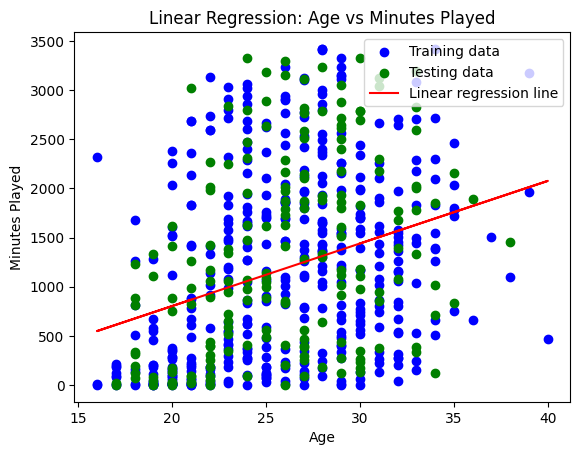

In [26]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluate training set performance
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print("Training Set Performance:")
print("R-squared:", r2_train)
print("Mean Squared Error:", mse_train)
print("Mean Absolute Error:", mae_train)

# Evaluate testing set performance
r2_test = r2_score(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)

print("\nTesting Set Performance:")
print("R-squared:", r2_test)
print("Mean Squared Error:", mse_test)
print("Mean Absolute Error:", mae_test)

# Visual inspection
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Testing data')
plt.plot(X_train, model.predict(X_train), color='red', label='Linear regression line')
plt.xlabel('Age')
plt.ylabel('Minutes Played')
plt.title('Linear Regression: Age vs Minutes Played')
plt.legend()
plt.show()


<a id='conclusions'></a>
## conclusions

In conclusion, our project on "Expert System for Analyzing Player Statistics in La Liga: A Data-driven Approach" utilizes FBref data to develop a robust system. Through data gathering, cleaning, and exploratory analysis, we lay the groundwork for insightful player assessment. The expert system, coupled with a linear machine learning model, categorizes players based on age and minutes played, aiding teams and coaches in decision-making. This holistic approach underscores the significance of data-driven methodologies in sports analytics, offering actionable insights for player evaluation and team strategy optimization in La Liga and beyond.

In [29]:
! jupyter nbconvert --to html to expertSystem.ipynb

[NbConvertApp] WARNING | pattern 'to' matched no files
[NbConvertApp] Converting notebook expertSystem.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 560392 bytes to expertSystem.html
